In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
image = np.array([[[[1],[2],[3]], [[4],[5],[6]],[[7],[8],[9]]]], dtype = np.float32)

In [4]:
image.shape

(1, 3, 3, 1)

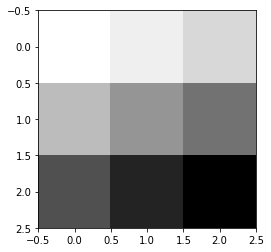

In [5]:
plt.imshow(image.reshape(3,3), cmap='Greys')

In [57]:
weight = tf.constant([[[[1,10,-1]],[[1,10,-1]]],[[[1,10,-1]],[[1,10,-1]]]], dtype=np.float32)

In [58]:
weight.shape

TensorShape([Dimension(2), Dimension(2), Dimension(1), Dimension(3)])

In [59]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    conv2d = tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding='SAME')
    conv2d_img = conv2d.eval()

In [60]:
conv2d

<tf.Tensor 'Conv2D_9:0' shape=(1, 3, 3, 3) dtype=float32>

In [61]:
conv2d_img

array([[[[ 12., 120., -12.],
         [ 16., 160., -16.],
         [  9.,  90.,  -9.]],

        [[ 24., 240., -24.],
         [ 28., 280., -28.],
         [ 15., 150., -15.]],

        [[ 15., 150., -15.],
         [ 17., 170., -17.],
         [  9.,  90.,  -9.]]]], dtype=float32)

In [62]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

In [63]:
conv2d_img

array([[[[ 12.],
         [ 16.],
         [  9.]],

        [[ 24.],
         [ 28.],
         [ 15.]],

        [[ 15.],
         [ 17.],
         [  9.]]],


       [[[120.],
         [160.],
         [ 90.]],

        [[240.],
         [280.],
         [150.]],

        [[150.],
         [170.],
         [ 90.]]],


       [[[-12.],
         [-16.],
         [ -9.]],

        [[-24.],
         [-28.],
         [-15.]],

        [[-15.],
         [-17.],
         [ -9.]]]], dtype=float32)

In [66]:
conv2d_img.shape

(3, 3, 3, 1)

[[12. 16.  9.]
 [24. 28. 15.]
 [15. 17.  9.]]
[[120. 160.  90.]
 [240. 280. 150.]
 [150. 170.  90.]]
[[-12. -16.  -9.]
 [-24. -28. -15.]
 [-15. -17.  -9.]]


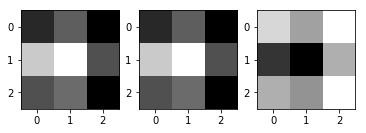

In [67]:
for i, one_img in enumerate(conv2d_img):
    print(one_img.reshape(3,3))
    plt.subplot(1,3,i+1), plt.imshow(one_img.reshape(3,3), cmap='gray')

In [69]:
image = np.array([[[[4],[3]],[[2],[1]]]],dtype = np.float32)

In [88]:
pool = tf.nn.max_pool(image, ksize=[1,2,2,1], strides=[1,1,1,1], padding='SAME')

In [89]:
pool.shape

TensorShape([Dimension(1), Dimension(2), Dimension(2), Dimension(1)])

In [90]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    print(pool.eval())

[[[[4.]
   [3.]]

  [[2.]
   [1.]]]]


In [87]:
image.shape

(1, 2, 2, 1)

In [3]:
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
mnist = input_data.read_data_sets("mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting mnist\t10k-images-idx3-ubyte.gz
Extracting mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
img = mnist.train.images[0].reshape(28, 28)

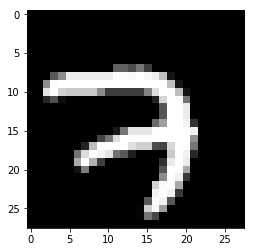

In [6]:
plt.imshow(img, cmap='gray')

In [8]:
sess = tf.InteractiveSession()

C:\users\user\anaconda3\lib\site-packages\tensorflow\python\client\session.py:1645: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [19]:
img = img.reshape(-1, 28, 28, 1)

In [20]:
W1 = tf.Variable(tf.random_normal([3,3,1,5], stddev=0.01))

In [21]:
conv2d = tf.nn.conv2d(img, W1, strides=[1,2,2,1], padding='SAME')

In [22]:
conv2d

<tf.Tensor 'Conv2D_1:0' shape=(1, 14, 14, 5) dtype=float32>

In [23]:
sess.run(tf.global_variables_initializer())

In [24]:
conv2d_img  = conv2d.eval()

In [25]:
conv2d_img.shape

(1, 14, 14, 5)

In [26]:
conv2d_img = np.swapaxes(conv2d_img, 0, 3)

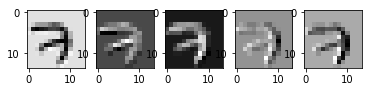

In [28]:
for i, one_img in enumerate(conv2d_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(14,14), cmap='gray')

In [30]:
pool = tf.nn.max_pool(conv2d, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [31]:
pool

<tf.Tensor 'MaxPool:0' shape=(1, 7, 7, 5) dtype=float32>

In [32]:
sess.run(tf.global_variables_initializer())

In [33]:
pool_img = pool.eval()

In [36]:
pool_img = np.swapaxes(pool_img, 0, 3)

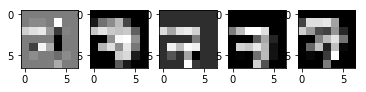

In [39]:
for i, one_img in enumerate(pool_img):
    plt.subplot(1, 5, i+1), plt.imshow(one_img.reshape(7, 7), cmap='gray')

In [ ]:
##############################

In [104]:
tf.reset_default_graph()

In [105]:
X = tf.placeholder(tf.float32, [None, 784])

In [106]:
X_img = tf.reshape(X, [-1, 28, 28, 1])

In [107]:
Y = tf.placeholder(tf.float32, [None, 10])

In [108]:
W1 = tf.Variable(tf.random_normal([3,3,1,32], stddev=0.01))

In [109]:
L1 = tf.nn.conv2d(X_img, W1, strides=[1,1,1,1], padding='SAME')
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [110]:
L1

<tf.Tensor 'MaxPool:0' shape=(?, 14, 14, 32) dtype=float32>

In [111]:
W2 = tf.Variable(tf.random_normal([3,3,32,64], stddev=0.01))

In [112]:
L2 = tf.nn.conv2d(L1, W2, strides=[1,1,1,1], padding='SAME')
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')

In [113]:
L2

<tf.Tensor 'MaxPool_1:0' shape=(?, 7, 7, 64) dtype=float32>

In [114]:
L2 = tf.reshape(L2, [-1, 7 * 7 * 64])

In [115]:
L2

<tf.Tensor 'Reshape_1:0' shape=(?, 3136) dtype=float32>

In [116]:
W3 = tf.get_variable("W2", shape=[7 * 7 * 64, 10],
                     initializer=tf.contrib.layers.xavier_initializer())

In [117]:
W3

<tf.Variable 'W2:0' shape=(3136, 10) dtype=float32_ref>

In [118]:
b = tf.Variable(tf.random_normal([10]))

In [119]:
hypothesis = tf.matmul(L2, W3) + b

In [121]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))

In [133]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [134]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [135]:
training_epochs = 15

In [136]:
batch_size = 100

In [138]:
keep_prob = tf.placeholder(tf.float32)

In [143]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = int(mnist.train.num_examples / batch_size)
    for i in range(total_batch):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        feed_dict = {X: batch_xs, Y: batch_ys}
        c, _, = sess.run([cost, optimizer], feed_dict=feed_dict)
        avg_cost += c / total_batch
    print('Epoch: ', '%04d' % (epoch + 1), 'cost= ', '{:.9f}'.format(avg_cost))
print('Learing Finished!')

Epoch:  0001 cost=  0.013518058
Epoch:  0002 cost=  0.011502541
Epoch:  0003 cost=  0.010776503
Epoch:  0004 cost=  0.009323329
Epoch:  0005 cost=  0.009257458
Epoch:  0006 cost=  0.007372995
Epoch:  0007 cost=  0.007444313
Epoch:  0008 cost=  0.007086533
Epoch:  0009 cost=  0.005182490
Epoch:  0010 cost=  0.006292551
Epoch:  0011 cost=  0.004958511
Epoch:  0012 cost=  0.004541453
Epoch:  0013 cost=  0.004624463
Epoch:  0014 cost=  0.003964740
Epoch:  0015 cost=  0.003703678
Learing Finished!


In [145]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1)) 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) 
print('Accuracy:', sess.run(accuracy, feed_dict={ 
      X: mnist.test.images, Y: mnist.test.labels, keep_prob: 1})) 

NameError: name 'logits' is not defined